# Data analysis for clustering


In this section we will use some visualization techniques to check for eventually discrepancies/patterns from the statistical point of view, on the dataset. This will enable us to verify if there are any features that will create any relevant pattern that could lead to a pattern to build a customer profile, guided by the compliance response. Therefore, the summarizing, the idea is to try to build a persona that most probably would accept the offer of the campaing, and a persona who most probably will not. To do this, we must create some corralation analysis, to check the  viability of using common cluster techniques to build this personas profiles.

## Reading the DataSet

First we will read the dataset:

In [1]:

import pandas as pd

data_path = './ifood-data-business-analyst-test/ml_project1_data.csv'
dataset = pd.read_csv(data_path)


### Preprocessing 

Here we need to provide a simple preprocess to the data to remove possible non informative data, to create information fields that are more suitable for interpretation, some encoding of the features (since some are categorical), also we will make some normalization on the data to avoid over weighting errors and so on... 

> Notice that most functions to do the preprocessing here are implemented in a separated code, since it could be used for other models, and for later analysis.

In [2]:
from utils import *

### Pipeline

The preprocessing pipeline, for the XGBoost classification algorithm will be the one, as follows:

- `Step #1` First we will replace some fields with more interpretable information (Birth date => Age, Customer Registration => Persistence, ...)

- `Step #2` Then some non informative features will be dropped from the analysis, _e.g._ features that are constant in all samples (which does not provide any information)

- `Step #3` Since we have only 24 samples with NaN (or null) values, we can drop those from the dataset, instead of concerning with interpolation and so on...

> _This pipeline was first developed for the prediction model XGBoost, and is beeing borrowed for this analysis._

In [3]:

dataset = support.replaceFields(dataset)             # Step #1

dataset = support.dropNonInformative(dataset)        # Step #2

df = dataset.dropna()                                # Step #3


Features dropped: ['Z_CostContact', 'Z_Revenue']


## Correlation analysis

To check if there are any features that are most correlated with each other, and check for possible relations to start building the profiles, a heatmap of the cross correlation matrix of the dataset will be created:

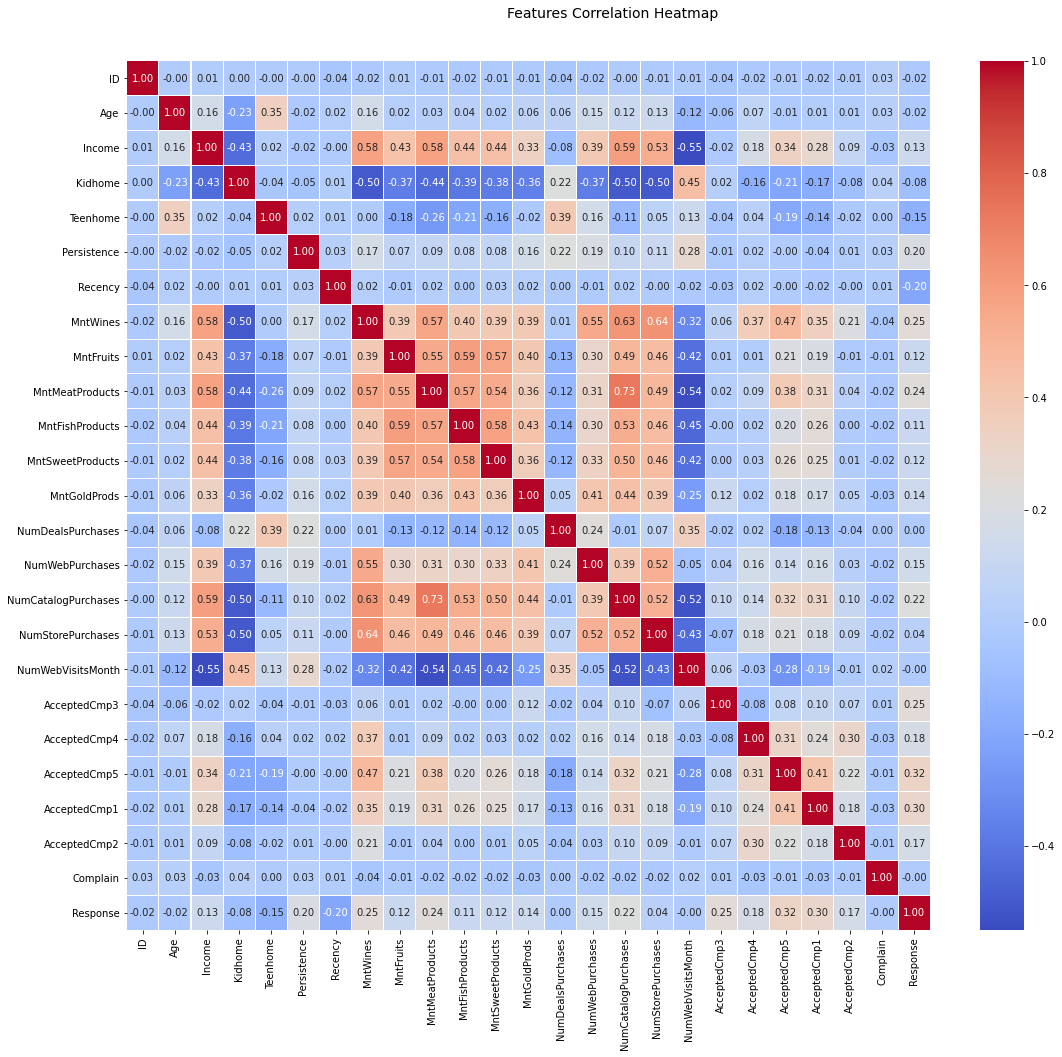

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(18, 15))

corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Features Correlation Heatmap', fontsize=14)
    

From the above image, we might realise that the last line (Response feature) does not present any highly correlated feature (not even positive or negative correlation), _e.g._ the highest correlation lies in 32% wich is pretty poor. But before discanting the possibility to create a persona guided by the Response feature, lets try to see those distributions.

To do that we can build a cross feature scatter plot, together with each feature statistical density distribution to check for some mathematical relations. Notice that the correlation heat map above provide a lot of statistical information about the data. The mathematical point of view provided in the next figure, will show how much complex a transformation must be, to create a feasible multi dimensional space capable of creating relations between the data.

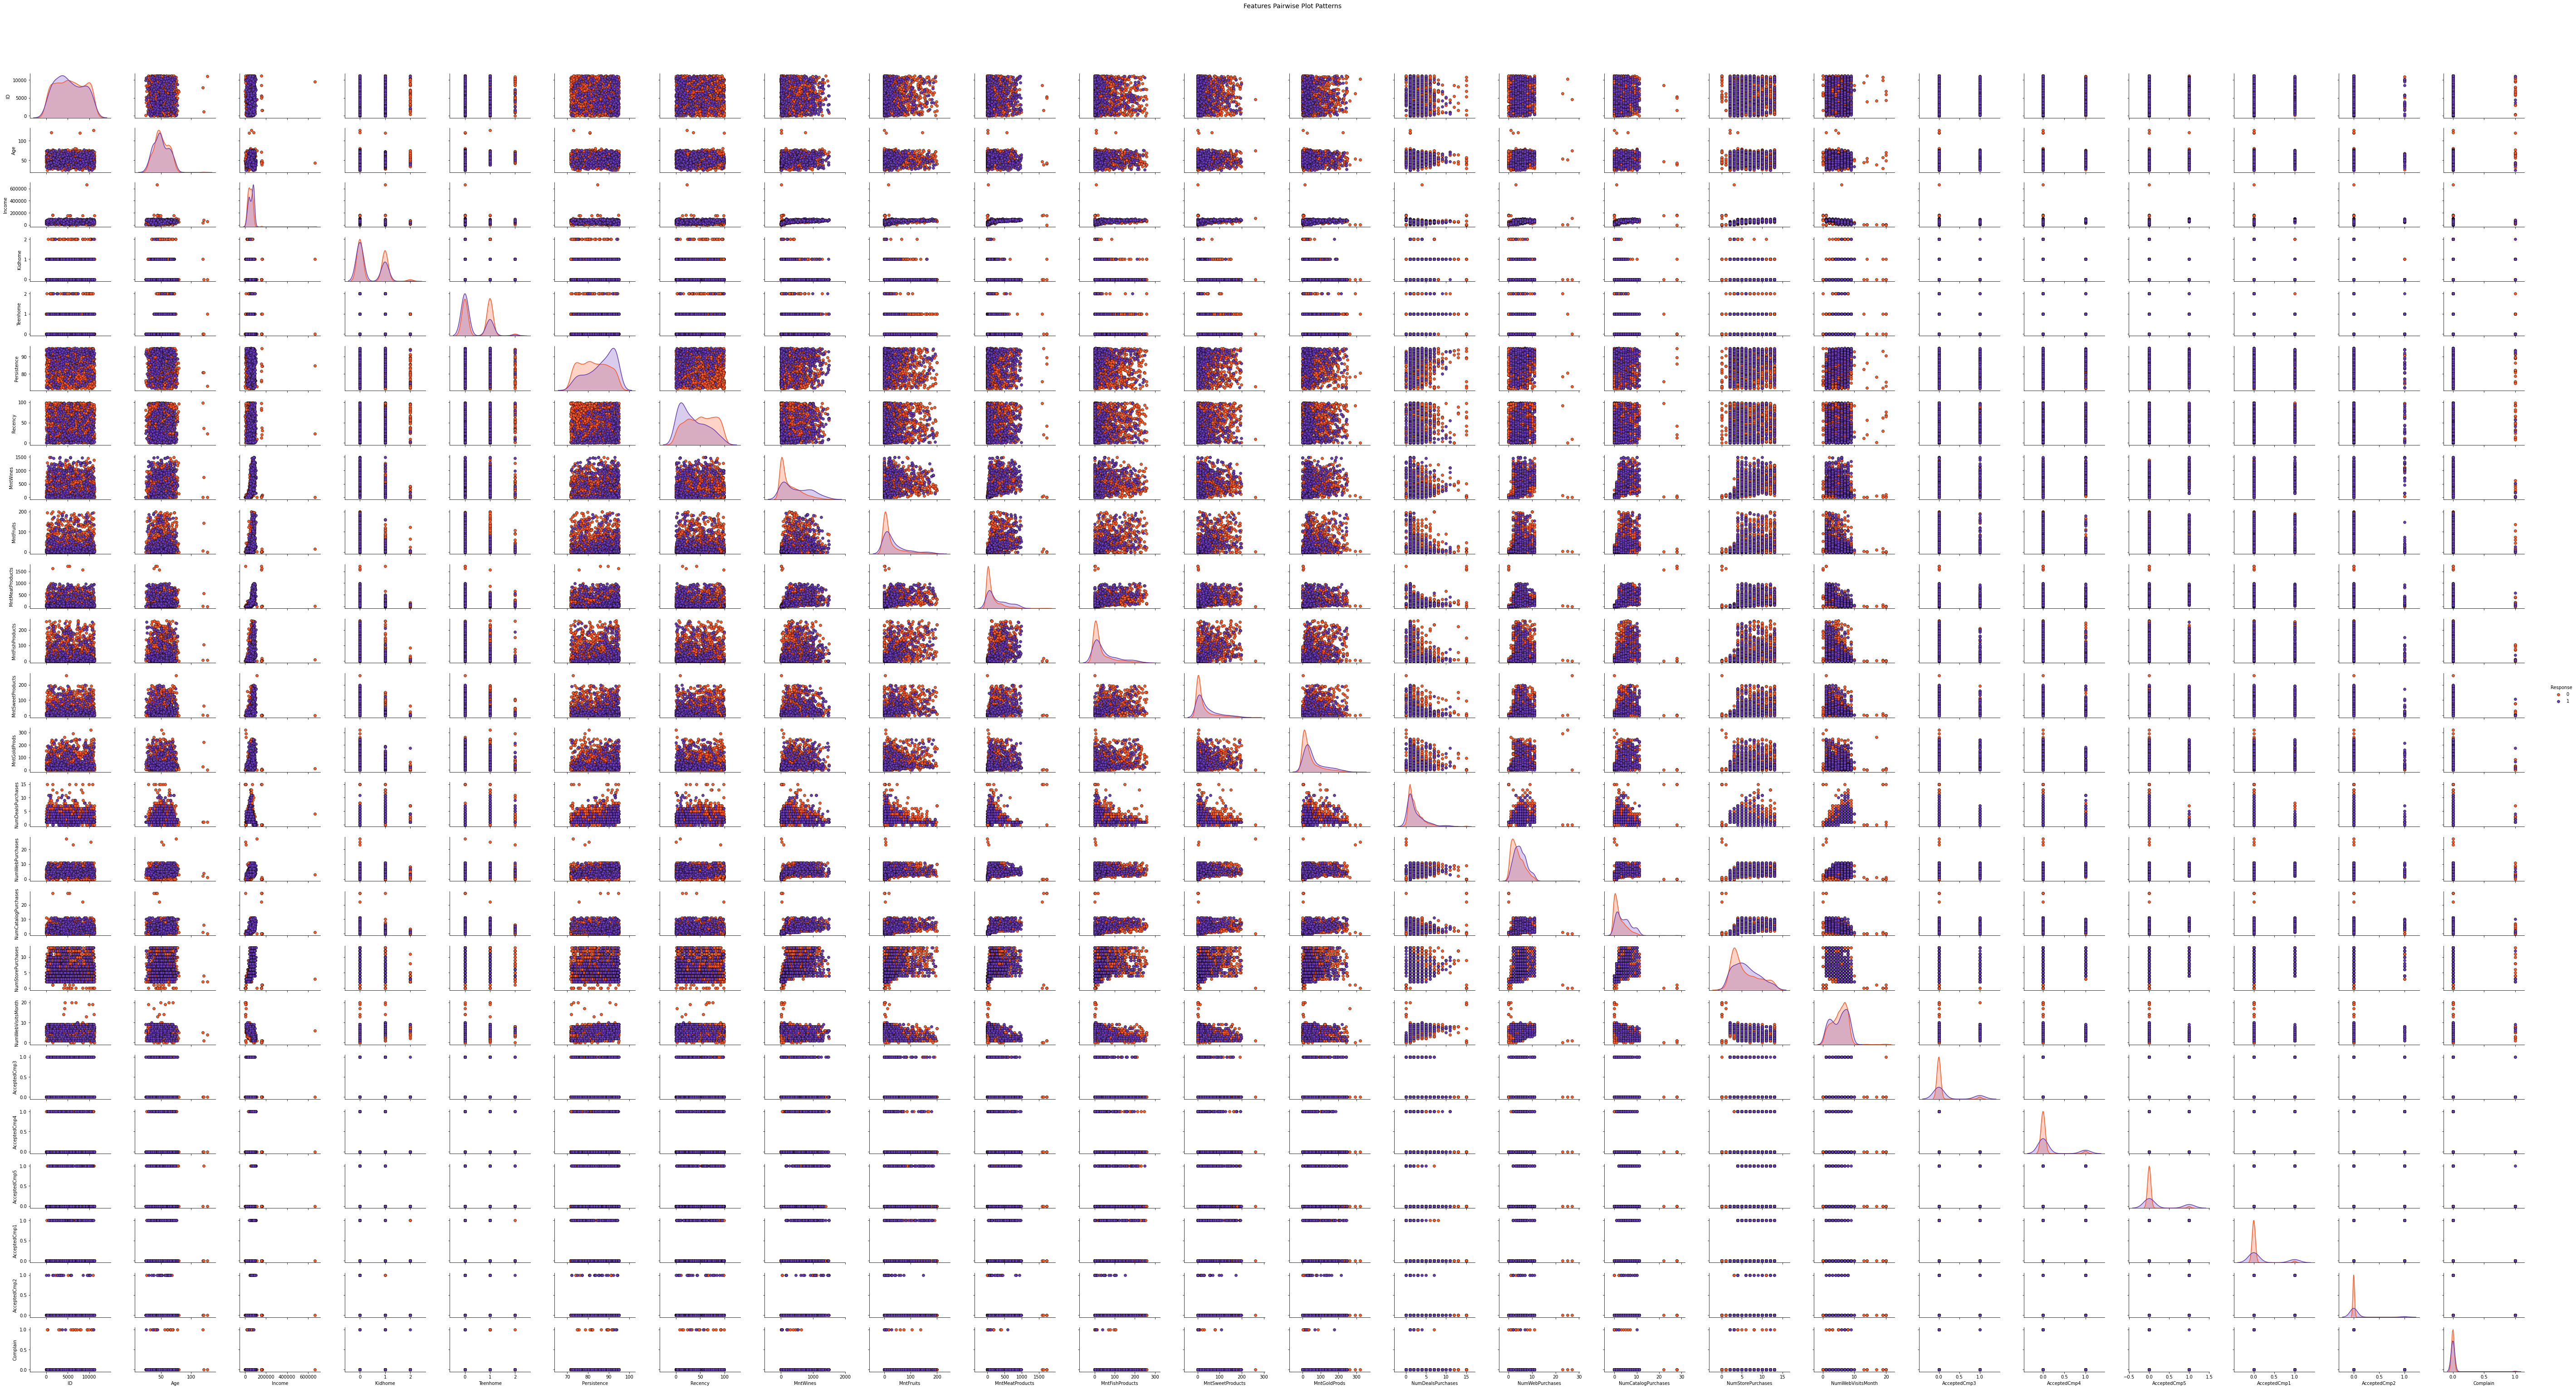

In [8]:

import seaborn as sns
import matplotlib.pyplot as pp

# Remove some categorical fields
phi = df.loc[:, ~df.columns.isin(['ID'])].to_numpy()

# Build some other dataset patterns

# Pair-wise Scatter Plots
pp = sns.pairplot(df, hue='Response', size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  palette={1: "#673ab7", 0: "#ff5722"},
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Features Pairwise Plot Patterns', fontsize=14)


There are several things to notice from the above plot. The first one is that the assumption of not beeing able to create a persona for each Response is correct! It is not possible, with conventional clusterization technique, create two customer profiles that will probably fit the each Response result. This is proven using the diagonal distributions, where one see that no inference/hypotesis test would be appliable to any of those statistical distributions. They actually have a simillar statistical nature at each feature for both Response values.

From the scatter plots, we can see that the Response samples are very randomized distributed. And therefore, nothing less complex then a radial basis function (which can represent high dimension distributions) could be able to build a geometrical space where each of those features could be segregated. Therefore no simple cluster technique will be able to create confident clusterizations of this dataset. 

> Actually some spectral cluster algorithms would be able to do as such clusterizations. But it is a lot of work to not be sure about the result. We now know that we need some highlly complex geometrical space builder to segregate those data... So lets go to then. Those would be Support Vector Machine, Extreme Gradients, Deep Networks, and so on.